In [6]:
import pandas as pd
df = pd.read_csv('SchvaleniUveru.csv',delimiter=";")

df

,Vek,Zamestnani,Nemovitosti,Splaceni v minulosti,Uver
0,nizke,ne,ne,spatne,neziskal
1,nizke,ano,ne,dobre,neziskal
2,nizke,ano,ne,dobre,ziskal
3,nizke,ano,ano,spatne,ziskal
4,nizke,ne,ne,spatne,neziskal
5,stredni,ne,ne,spatne,neziskal
6,stredni,ne,ne,dobre,neziskal
7,stredni,ano,ano,dobre,ziskal
8,stredni,ne,ano,vyborne,ziskal
9,stredni,ne,ano,vyborne,ziskal


In [9]:
from sklearn import tree

feature_cols = ['Vek', 'Zamestnani', 'Nemovitosti', 'Splaceni v minulosti']
X = df[feature_cols]
y = df['Uver']

X
clf = tree.DecisionTreeClassifier()
one_hot_data = pd.get_dummies(X)
clf.fit(one_hot_data, y)
one_hot_data

,Vek_nizke,Vek_stredni,Vek_vysoke,Zamestnani_ano,Zamestnani_ne,Nemovitosti_ano,Nemovitosti_ne,Splaceni v minulosti_dobre,Splaceni v minulosti_spatne,Splaceni v minulosti_vyborne
0,1,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,0,1,1,0,0
2,1,0,0,1,0,0,1,1,0,0
3,1,0,0,1,0,1,0,0,1,0
4,1,0,0,0,1,0,1,0,1,0
5,0,1,0,0,1,0,1,0,1,0
6,0,1,0,0,1,0,1,1,0,0
7,0,1,0,1,0,1,0,1,0,0
8,0,1,0,0,1,1,0,0,0,1
9,0,1,0,0,1,1,0,0,0,1


In [11]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render()

'Source.gv.pdf'

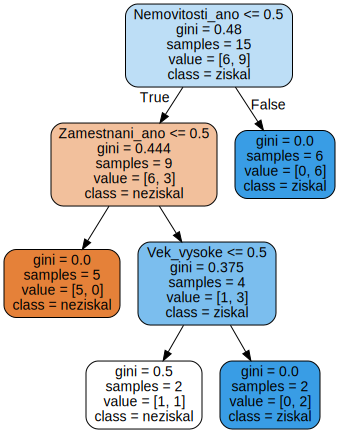

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, 
    class_names=y.unique(),
    feature_names=one_hot_data.columns,
    filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph 


In [13]:
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
X=iris.data
y=iris.target

In [16]:
tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X, y)
# y_pred = tree.predict(X_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)